# Training using the bloom-speech dataset from sil-ai

In [3]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [1]:
!pip install --upgrade pip
!pip install --upgrade transformers accelerate evaluate jiwer tensorboard
# !pip install torch torchvision datasets[audio]
# pip install gradio streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Suc

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
# We need to download a version of datasets earlier than 3.0.0
!pip uninstall datasets[audio] -y

Found existing installation: datasets 3.1.0
Uninstalling datasets-3.1.0:
  Successfully uninstalled datasets-3.1.0


In [4]:
!pip install datasets[audio]==2.16.1

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
  Using cached multiprocess-0.70.17-py310-none-any.whl.metadata (7.2 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2023.10.0 which is incompatible.


In [1]:
import datasets

datasets.__version__

'2.16.1'

In [5]:
from datasets import load_dataset

# Specify the language code.
bloom = load_dataset("sil-ai/bloom-speech", "tgl", use_auth_token=True) #note you must login to HuggingFace via the huggingface hub or huggingface cli

/usr/local/lib/python3.10/dist-packages/datasets/load.py:2483: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for sil-ai/bloom-speech contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sil-ai/bloom-speech
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

https://s3.amazonaws.com/bloom-speech/audio/tgl-0000-i52ff7462-3bcb-4dc0-86b8-5d9f3a25b09e.mp3 failed to download. Data may be missing.
https://s3.amazonaws.com/bloom-speech/audio/tgl-0000-i0924922c-69c9-40ae-ad9a-ea60a4574db5.mp3 failed to download. Data may be missing.


In [4]:
# A data point consists of transcribed audio in the specified language code.
# To see a transcription:
bloom['train']['text'][0]

'"Gagamit ako ng plantsa sa buhok upang ito ay tumuwid," wika ni Ekay.'

In [3]:
bloom

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'text', 'book', 'instance', 'license', 'credits', 'original_lang_tag'],
        num_rows: 352
    })
    test: Dataset({
        features: ['file', 'audio', 'text', 'book', 'instance', 'license', 'credits', 'original_lang_tag'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['file', 'audio', 'text', 'book', 'instance', 'license', 'credits', 'original_lang_tag'],
        num_rows: 48
    })
})

## Possibilities:

1. Since this dataset is so small, consider using this dataset as a test set to see how well the fine-tuned model generalizes to a different dataset, in the spirit of the Whisper author's philosophy of throwing any and all data at it.
2. Do some small training, but make sure that the dataset is normalized in a similar way to the Fleurs dataset (How?)
--> use a validation set to see performance at the beginning, but you must use the test set at the very end...

In [6]:
from transformers import WhisperForConditionalGeneration, WhisperProcessor

model = WhisperForConditionalGeneration.from_pretrained("IroquoisHadoop/whisper-tl")
processor = WhisperProcessor.from_pretrained("IroquoisHadoop/whisper-tl")

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

In [7]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 75.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [8]:
# from transformers import pipeline
# import gradio as gr

# pipe = pipeline(model="sanchit-gandhi/whisper-small-hi")  # change to "your-username/the-name-you-picked"

# def transcribe(audio):
#     text = pipe(audio)["text"]
#     return text

# iface = gr.Interface(
#     fn=transcribe,
#     inputs=gr.Audio(source="microphone", type="filepath"),
#     outputs="text",
#     title="Whisper Small Hindi",
#     description="Realtime demo for Hindi speech recognition using a fine-tuned Whisper small model.",
# )

# iface.launch()

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cpu


TypeError: Audio.__init__() got an unexpected keyword argument 'source'

In [9]:
from transformers import pipeline
import gradio as gr

from transformers import WhisperForConditionalGeneration, WhisperProcessor

# model = WhisperForConditionalGeneration.from_pretrained("IroquoisHadoop/whisper-tl")
# processor = WhisperProcessor.from_pretrained("IroquoisHadoop/whisper-tl")

transcriber = pipeline(
    # "automatic-speech-recognition",
    model="IroquoisHadoop/whisper-tl"
)

def transcribe(audio):
    text = transcriber(audio)["text"]
    return text

iface = gr.Interface(
    fn=transcribe,
    # inputs=gr.Audio(source="microphone", type="filepath"),
    inputs=gr.Audio(sources="microphone", type="filepath"),
    outputs="text",
    title="Whisper Small Tagalog",
    description="Realtime demo for Tagalog speech recognition using a fine-tuned Whisper small model.",
)

iface.launch()


Device set to use cpu


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af7eb508a1ee264f93.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


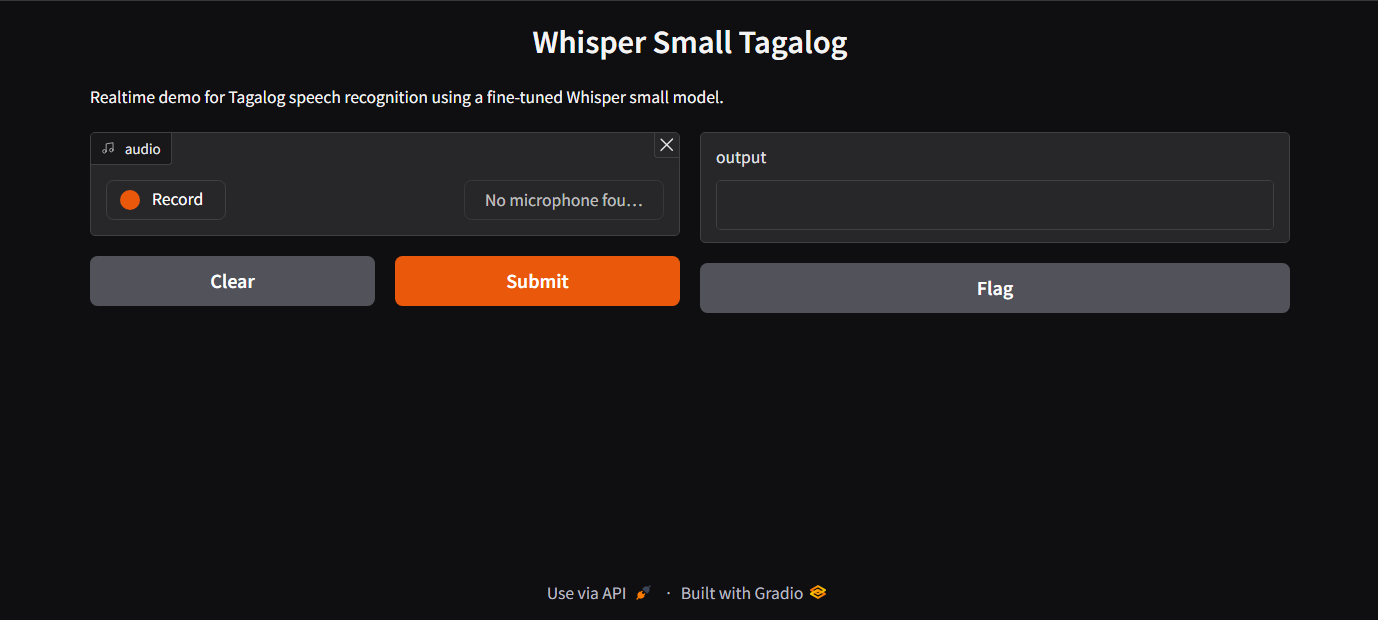

In [ ]:
print(processor.tokenizer.all_special_tokens)
print(processor.tokenizer.all_special_ids)

['<|endoftext|>', '<|startoftranscript|>', '<|en|>', '<|zh|>', '<|de|>', '<|es|>', '<|ru|>', '<|ko|>', '<|fr|>', '<|ja|>', '<|pt|>', '<|tr|>', '<|pl|>', '<|ca|>', '<|nl|>', '<|ar|>', '<|sv|>', '<|it|>', '<|id|>', '<|hi|>', '<|fi|>', '<|vi|>', '<|he|>', '<|uk|>', '<|el|>', '<|ms|>', '<|cs|>', '<|ro|>', '<|da|>', '<|hu|>', '<|ta|>', '<|no|>', '<|th|>', '<|ur|>', '<|hr|>', '<|bg|>', '<|lt|>', '<|la|>', '<|mi|>', '<|ml|>', '<|cy|>', '<|sk|>', '<|te|>', '<|fa|>', '<|lv|>', '<|bn|>', '<|sr|>', '<|az|>', '<|sl|>', '<|kn|>', '<|et|>', '<|mk|>', '<|br|>', '<|eu|>', '<|is|>', '<|hy|>', '<|ne|>', '<|mn|>', '<|bs|>', '<|kk|>', '<|sq|>', '<|sw|>', '<|gl|>', '<|mr|>', '<|pa|>', '<|si|>', '<|km|>', '<|sn|>', '<|yo|>', '<|so|>', '<|af|>', '<|oc|>', '<|ka|>', '<|be|>', '<|tg|>', '<|sd|>', '<|gu|>', '<|am|>', '<|yi|>', '<|lo|>', '<|uz|>', '<|fo|>', '<|ht|>', '<|ps|>', '<|tk|>', '<|nn|>', '<|mt|>', '<|sa|>', '<|lb|>', '<|my|>', '<|bo|>', '<|tl|>', '<|mg|>', '<|as|>', '<|tt|>', '<|haw|>', '<|ln|>', '<|ha|

In [ ]:
input_str = bloom['train']['text'][0]
labels = processor.tokenizer(input_str).input_ids
decoded_with_special = processor.tokenizer.decode(labels, skip_special_tokens=False)
decoded_str = processor.tokenizer.decode(labels, skip_special_tokens=True)

In [ ]:
f"Input:                 {input_str}"

'Input:                 "Gagamit ako ng plantsa sa buhok upang ito ay tumuwid," wika ni Ekay.'

In [ ]:
f"Decoded w/ special:    {decoded_with_special}"

'Decoded w/ special:    <|startoftranscript|><|notimestamps|>"Gagamit ako ng plantsa sa buhok upang ito ay tumuwid," wika ni Ekay.<|endoftext|>'

In [ ]:
f"Decoded w/out special: {decoded_str}"

'Decoded w/out special: "Gagamit ako ng plantsa sa buhok upang ito ay tumuwid," wika ni Ekay.'

In [ ]:
f"Are input and decoded str equal:             {input_str == decoded_str}"

'Are input and decoded str equal:             True'

## Ok, so looking at this:
Maybe I should have added the basic_normalization to the steps of the prepare dataset function for the first notebook...

In [ ]:
bloom["train"]["audio"][0]["sampling_rate"]

16000

## Prepare dataset

In [19]:
bloom["train"][0]

{'file': '/root/.cache/huggingface/datasets/downloads/7757a09e657d09c4f38f888450fe45655f1219f81d829921ab3f0a260dd6aab4.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/7757a09e657d09c4f38f888450fe45655f1219f81d829921ab3f0a260dd6aab4.mp3',
  'array': array([ 0.00424902,  0.0067621 ,  0.00346809, ..., -0.01323818,
         -0.02770973,  0.01227249]),
  'sampling_rate': 16000},
 'text': '"Gagamit ako ng plantsa sa buhok upang ito ay tumuwid," wika ni Ekay.',
 'book': 'Panaginip',
 'instance': '23d64056-b1d3-4365-bf1f-5fc9bff46fd6',
 'license': 'cc-by-nc',
 'credits': '',
 'original_lang_tag': 'tl'}

In [10]:
def prepare_dataset(batch):
    audio = batch["audio"]
    batch["input_features"] = processor(audio["array"], sampling_rate=16000).input_features[0]
    batch["labels"] = processor.tokenizer(batch["text"]).input_ids
    return batch

In [11]:
bloom = bloom.map(
    prepare_dataset,
    remove_columns=bloom.column_names["train"], # removes all cols except input_features and labels
    num_proc=4
)

Map (num_proc=4):   0%|          | 0/352 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/50 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
You have passed task=transcribe, but also have set `forced_decoder_ids` to [[1, 50259], [2, 50359], [3, 50363]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=transcribe.


Map (num_proc=4):   0%|          | 0/48 [00:00<?, ? examples/s]

## Data Collator

In [ ]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    decoder_start_token_id: int

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.decoder_start_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch


In [ ]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(
    processor=processor,
    decoder_start_token_id=model.config.decoder_start_token_id,
)

## Compute metrics

In [12]:
import evaluate

metric = evaluate.load("wer")

def compute_metrics(pred):
    # pred_logits = pred.predictions
    # pred_ids = np.argmax(pred_logits, axis=-1)
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = tokenizer.batch_decode(pred_ids, basic_normalize=True, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, basic_normalize=True, skip_special_tokens=True)

    wer = 100 * metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [ ]:
bloom['validation']['text'][0]

'Sabi naman ni Caloy, ako na po ang mag-aayos ng sinibak na kahoy.'

In [ ]:
bloom["test"]["text"][0]

'Ang Magpinsan'

# THIS NEEDS TO BE RUN FROM THIS POINT ON

## Train args and Trainer


In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-tl2",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=1,  # increase by 2x for every 2x decrease in batch size
    learning_rate=1e-5,
    warmup_steps=100,
    # max_steps=5000,  # excessive for my small dataset
    num_train_epochs=10,
    gradient_checkpointing=True,
    fp16=True,
    # group_by_length=True,
    # evaluation_strategy="steps",  # deprecated
    eval_strategy="steps",
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=100,  # how often to save intermediate checkpoints to the Hub
    eval_steps=25,  # how often evaluation of intermediate checkpoints
    logging_steps=25,
    report_to=["tensorboard"],  # logs to the Hub
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=True,
)


In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args, # using previously-defined training args
    model=model,  # our predefined Whisper-small model
    train_dataset=fleurs["train"],
    eval_dataset=fleurs["validation"], # saving the test set for the very end
    data_collator=data_collator,  # our data collator
    compute_metrics=compute_metrics,  # WER function
    # tokenizer=processor.feature_extractor  # this is deprecated
    processing_class=processor
)


In [ ]:
processor.save_pretrained(training_args.output_dir)

In [ ]:
trainer.train(
    # resume_from_checkpoint=True  # if training interrupted, use last checkpoint from output_dir
)

## Pushing results to Hub

In [ ]:
# kwargs = {
#     "dataset_tags": "google/fleurs",
#     "dataset": "Fleurs",  # a 'pretty' name for the training dataset
#     "dataset_args": "config: tl, split: test",
#     "language": "tl",
#     "model_name": "Whisper Small Tl - Jesse Hilario",  # a 'pretty' name for your model
#     "finetuned_from": "openai/whisper-small",
#     "tasks": "automatic-speech-recognition",
# }

In [ ]:
# trainer.push_to_hub(**kwargs)

# THIS ONE SHOULD BE THE LEGIT TESTING

# THIS IS USING TEST SET (CHEATING) AND SEEING ITS PERFORMANCE; TRAIN THE MODEL IF THERE'S TIME

## Evaluating Test set using results

In [13]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

In [14]:
# Define map_to_pred
def map_to_pred(batch):
    input_features = batch["input_features"]

    # Ensure input_features is a 3D tensor
    input_features = torch.tensor(input_features)
    if len(input_features.shape) == 2:
        input_features = input_features.unsqueeze(0)

    input_features = input_features.to(device)

    # Create attention mask for non-zero values
    attention_mask = (input_features != 0).float().to(device)

    with torch.no_grad():
        predicted_ids = model.generate(
            input_features,
            attention_mask=attention_mask
        )

    batch["prediction"] = predicted_ids.tolist()  # Convert to list for JSON compatibility
    return batch

In [15]:
# Apply map_to_pred to the test set
result = bloom["test"].map(
    map_to_pred,
    remove_columns=["input_features"],  # Remove unnecessary columns
    num_proc=1  # setting to 4 won't work
)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [16]:
# Flatten nested predictions
flat_predictions = [pred for sublist in result["prediction"] for pred in sublist]

# Decode predictions and references. Must use basic_normalize=True since it's multilingual
prediction = processor.batch_decode(flat_predictions, basic_normalize=True, skip_special_tokens=True)
reference = processor.batch_decode(bloom["test"]["labels"], basic_normalize=True, skip_special_tokens=True)

# Compute and print WER
print(100 * metric.compute(references=reference, predictions=prediction))


16.631130063965884


In [17]:
prediction[0]

'ang magbinsan'

In [18]:
reference[0]

'ang magpinsan'